<a href="https://colab.research.google.com/github/amrit2603/Gen-AI/blob/main/ModelsExamples.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

# Normalization Example

import numpy as np

# Sample data
data = np.array([10, 20, 30, 40, 50, 1000])  # 1000 is an outlier

# Min-Max Scaling: Scales values between 0 and 1
def min_max_scaling(data):
    min_val = np.min(data)
    max_val = np.max(data)
    return (data - min_val) / (max_val - min_val)

# Z-Score Standardization: Mean = 0, Standard Deviation = 1
def z_score_standardization(data):
    mean = np.mean(data)
    std_dev = np.std(data)
    return (data - mean) / std_dev

# Apply normalization techniques
min_max_scaled = min_max_scaling(data)
z_score_scaled = z_score_standardization(data)

# Print results
print("Original Data:", data)
print("Min-Max Scaled Data:", min_max_scaled)
print("Z-Score Standardized Data:", z_score_scaled)


Original Data: [  10   20   30   40   50 1000]
Min-Max Scaled Data: [0.         0.01010101 0.02020202 0.03030303 0.04040404 1.        ]
Z-Score Standardized Data: [-0.50221883 -0.47457376 -0.44692869 -0.41928361 -0.39163854  2.23464343]


# ***Example 1 - MNIST Handwritten Digits Classification***

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8778 - loss: 0.4360
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9644 - loss: 0.1207
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9765 - loss: 0.0786
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9821 - loss: 0.0587
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9862 - loss: 0.0456
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9727 - loss: 0.0917
Test accuracy: 97.60%
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


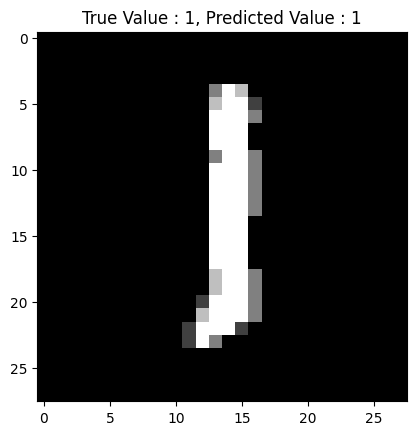

In [ ]:
# Dense Layers - Example 1 - MNIST Handwritten Digits Data

import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

x_train, x_test = x_train / 255.0, x_test / 255.0

model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Dense layers expect a 1D input, so whenever the preceding layer produces multi-dimensional output,
# We must flatten it to 1D before passing it to a Dense layer

# If the input to a Dense layer is not already 1D, use Flatten to convert it to 1D

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5)

test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_accuracy * 100:.2f}%')

predictions = model.predict(x_test)

plt.imshow(x_test[14], cmap='gray')
plt.title(f"True Value : {y_test[14]}, Predicted Value : {np.argmax(predictions[14])}")
plt.show()


# **Example 2 - House Price Prediction (Regression)**

### **Synthetic Dataset**

In [ ]:
# Example 2 - House Price Prediction (Regression) with Synthetic dataset
# Predict house prices based on 10 numerical features

import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np

# Generate synthetic dataset (1000 samples, 10 features)
np.random.seed(42)
x_train = np.random.rand(1000, 10)
y_train = np.random.rand(1000) * 500000  # House prices between 0-500K

x_test = np.random.rand(200, 10)
y_test = np.random.rand(200) * 500000

# Build model
model = models.Sequential([
    layers.Dense(64, activation='relu', input_shape=(10,)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)  # Single output for regression
])

# Compile model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train model
model.fit(x_train, y_train, epochs=20, batch_size=32, verbose=1)

# Evaluate model
test_loss, test_mae = model.evaluate(x_test, y_test)
print(f'Test MAE: ${test_mae:.2f}')

# Make a prediction
sample_input = np.random.rand(1, 10)
predicted_price = model.predict(sample_input)
print(f'Predicted House Price: ${predicted_price[0][0]:.2f}')


# MAE is around 243K - 245K, which means on average, the predictions are off by nearly half of the actual house price.
# This is very bad because an error of
# 500K means the model is almost random.
# The dataset is completely random, meaning there is no real pattern for the model to learn.
# The model is guessing house prices randomly, which is why MAE is so large.
# In short, bad model

Epoch 1/20


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 84558716928.0000 - mae: 251352.0625
Epoch 2/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 83591258112.0000 - mae: 250964.9375
Epoch 3/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 83618979840.0000 - mae: 249415.2188
Epoch 4/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 83353616384.0000 - mae: 251893.1094
Epoch 5/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 85101207552.0000 - mae: 253153.4531
Epoch 6/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 80722378752.0000 - mae: 246151.6562
Epoch 7/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 85964865536.0000 - mae: 256741.0625
Epoch 8/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 83430563840.0000 - mae: 249257.7031
Epoch 9/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 78383849472.0000 - mae: 242050.2188
Epoch 10/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 86624731136.0000 - mae: 257886.3281
Epoch 11/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 80760692736

## Synthetic dataset and **Normalization**

In [ ]:
# Example 2 - House Price Prediction (Regression) with Synthetic dataset and Normalization

import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np

# Generate synthetic dataset (1000 samples, 10 features) in [0,1] range
np.random.seed(42)
x_train = np.random.rand(1000, 10)
y_train = np.random.rand(1000)  # Target values in range 0-1

x_test = np.random.rand(200, 10)
y_test = np.random.rand(200)  # Targets in range 0-1

# Build model
model = models.Sequential([
    layers.Dense(64, activation='relu', input_shape=(10,)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)  # Single output for regression
])

# Compile model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train model
model.fit(x_train, y_train, epochs=20, batch_size=32, verbose=1)

# Evaluate model
test_loss, test_mae = model.evaluate(x_test, y_test)
print(f'Test MAE (Normalized): {test_mae:.4f}')

# Make a prediction
sample_input = np.random.rand(1, 10)  # In [0,1] range
predicted_value = model.predict(sample_input)
print(f'Predicted Value (Normalized): {predicted_value[0][0]:.4f}')

# This is again a bad model because we are still training on random values (just normalised values)

Epoch 1/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2387 - mae: 0.4071
Epoch 2/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0879 - mae: 0.2512
Epoch 3/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0843 - mae: 0.2483
Epoch 4/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0852 - mae: 0.2501
Epoch 5/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0842 - mae: 0.2485
Epoch 6/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0784 - mae: 0.2384
Epoch 7/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0847 - mae: 0.2508
Epoch 8/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0826 - mae: 0.2484
Epoch 9/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0789 - mae: 0.2400
Epoch 10/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0772 - mae: 0.2366
Epoch 11/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0831 - mae: 0.2483
Epoch 12/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0829 - mae: 0.2478
Epoch 13/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/ste

# **Dataset from scikit-learn** //from real life data


In [ ]:
# Example 2 - House Price Prediction (Regression) with Dataset

import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

# Load California housing dataset
data = fetch_california_housing()
x, y = data.data, data.target  # Features and target (median house value in 100,000s)

print(f"Target Value Range (in 100,000s): Min = {y.min():.2f}, Max = {y.max():.2f}, Mean = {y.mean():.2f}")

# Split data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Normalize features for better training stability - Z-Score Standardization / Standard scaling
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train) # Compute mean & std from training data, then scale
x_test = scaler.transform(x_test) # Use the same scaling parameters to transform test data

# We use the same mean and standard deviation (computed from x_train) to scale x_test
# This ensures that both training and test data follow the same distribution

# If we include x_test when computing mean and standard deviation, the model gets information from the test set before training
# This is called data leakage, which can lead to unrealistically good performance and poor generalization to new data
# Test data should only be used for evaluation after the model is trained

# In real-world applications, new data arrives after training. We do not get to recompute the mean and std for each new data point
# The model should be able to handle unseen data using the same scaling applied during training

# Build model
model = models.Sequential([
    layers.Dense(64, activation='relu', input_shape=(x_train.shape[1],)),  # Input features from dataset
    layers.Dense(32, activation='relu'),
    layers.Dense(1)  # Single output for regression
])

# Compile model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train model
model.fit(x_train, y_train, epochs=20, batch_size=32, verbose=1)

# Evaluate model
test_loss, test_mae = model.evaluate(x_test, y_test)
print(f'Test MAE: ${test_mae * 100000:.2f}')  # Convert to actual dollars

# Make a prediction
sample_input = np.expand_dims(x_test[0], axis=0)  # Take one test sample
predicted_price = model.predict(sample_input)
print(f'Predicted House Price: ${predicted_price[0][0] * 100000:.2f}')  # Convert to actual dollars

Target Value Range (in 100,000s): Min = 0.15, Max = 5.00, Mean = 2.07
Epoch 1/20


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


516/516 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 1.8771 - mae: 0.9482
Epoch 2/20
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4472 - mae: 0.4799
Epoch 3/20
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3741 - mae: 0.4374
Epoch 4/20
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4108 - mae: 0.4406
Epoch 5/20
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3658 - mae: 0.4215
Epoch 6/20
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3319 - mae: 0.4073
Epoch 7/20
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3486 - mae: 0.4096
Epoch 8/20
516/516 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.3443 - mae: 0.4070
Epoch 9/20
516/516 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.3253 - mae: 0.3953
Epoch 10/20
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3325 - mae: 0.3981
Epoch 11/20
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3144 - mae: 0.3900
Epoch 12/20
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3151 - mae: 0.3900
Epoch 13/20
516/516 ━━━━━━━━━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
Predicted House Price: $29431.34


# Example 3 - Sentiment Analysis (Binary Classification)

# **Without Embedding Layer**

In [ ]:
# Example 3 - Sentiment Analysis (Binary Classification) - Without Embedding Layer
# Classify whether a review is positive or negative

import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np

# Load IMDB dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.imdb.load_data(num_words=10000)

# IMDB reviews have different lengths, but Dense expects a fixed number of neurons
# We are ensuring every input is exactly 200 words.

# Pad sequences to ensure fixed-length inputs
from tensorflow.keras.preprocessing.sequence import pad_sequences
x_train = pad_sequences(x_train, maxlen=200)
x_test = pad_sequences(x_test, maxlen=200)

# Build model using only Dense layers
model = models.Sequential([
    layers.Flatten(input_shape=(200,)),  # Convert 2D sequences to 1D
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Binary classification
])

# Compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train model
model.fit(x_train, y_train, epochs=5, batch_size=512)

# Evaluate model
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_accuracy * 100:.2f}%')

# Make a prediction on the first test sample
predicted_sentiment = model.predict(x_test[0:1])
print("Predicted Sentiment:", "Positive" if predicted_sentiment[0][0] > 0.5 else "Negative")

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Epoch 1/5


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.5038 - loss: 240.7731
Epoch 2/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5272 - loss: 65.9617
Epoch 3/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5452 - loss: 34.7783
Epoch 4/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5448 - loss: 18.4605
Epoch 5/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5332 - loss: 9.3058
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5008 - loss: 6.7824
Test accuracy: 50.31%


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
Predicted Sentiment: Negative


# **With Embedding Layer**

The Embedding layer transforms integer word indices into dense vector representations.

# **Word Index Representation (Before Embedding)**
In the IMDB dataset, words are represented as integer indices based on their frequency in the dataset.
For example, a movie review:

# Original Sentence:
"The movie was amazing, I loved it!"

# **Tokenized & Indexed Representation:**

[10, 482, 21, 345, 7, 99, 4]
Here:

10 → "The"
482 → "movie"
21 → "was"
345 → "amazing"
7 → "I"
99 → "loved"
4 → "it"
👉 The model** does not understand the meaning** of these numbers. It only sees them as integers.

# **What Embedding Does**
Instead of treating 10, 482, 21, etc., as just numbers, an embedding layer converts each of them into a dense vector of real numbers.

layers.Embedding(input_dim=10000, output_dim=128, input_length=200)

# **input_dim**=10000 → Vocabulary size (top 10,000 words)
# output_dim=128 → Each word index gets mapped to a 128-dimensional vector
# input_length=200 → Each review is padded to 200 words
For example, the word index 10 (which represents "The") might be mapped to:

[0.12, -0.25, 0.78, ..., 0.05]  # A 128-dimensional vector
Each word in the sentence gets a similar vector.

# **Why Is This Useful?**
Captures Word Meaning → Similar words will have similar vectors.
Avoids Numeric Misinterpretation → Without embeddings, the model might think 99 > 10, which makes no sense for words.
Enables Word Relationships → Words like "king" and "queen" will have similar embeddings.
# **Example: Before vs After Embedding**
Before Embedding (Word Indices)

[10, 482, 21, 345, 7, 99, 4]  # Just numbers
After Embedding (Word Vectors, Each of Size 128)

[
  [0.12, -0.25, 0.78, ..., 0.05],   # Word 10
  [0.34, 0.67, -0.12, ..., -0.89],  # Word 482
  [0.08, 0.15, -0.32, ..., 0.40],   # Word 21
  ...
]
Each word now has a dense vector representation that captures its meaning.

In [ ]:
# Example 3 - Sentiment Analysis (Binary Classification) - With Embedding Layer

import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Load IMDB dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.imdb.load_data(num_words=10000)

# Pad sequences to ensure fixed-length inputs
x_train = pad_sequences(x_train, maxlen=200)
x_test = pad_sequences(x_test, maxlen=200)

# Build model using only Dense layers with an Embedding layer
model = models.Sequential([
    layers.Embedding(input_dim=10000, output_dim=128, input_length=200),  # Converts word indices to vectors
    layers.Flatten(),  # Flatten embeddings into a 1D vector
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Binary classification
])

# Compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train model
model.fit(x_train, y_train, epochs=10, batch_size=512)

# Evaluate model
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_accuracy * 100:.2f}%')

Epoch 1/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 21s 399ms/step - accuracy: 0.5846 - loss: 0.6514
Epoch 2/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 21s 416ms/step - accuracy: 0.9227 - loss: 0.2024
Epoch 3/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 19s 393ms/step - accuracy: 0.9919 - loss: 0.0387
Epoch 4/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 21s 400ms/step - accuracy: 0.9990 - loss: 0.0062
Epoch 5/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 19s 386ms/step - accuracy: 1.0000 - loss: 0.0010
Epoch 6/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 20s 410ms/step - accuracy: 1.0000 - loss: 4.5167e-04
Epoch 7/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 19s 389ms/step - accuracy: 1.0000 - loss: 2.7501e-04
Epoch 8/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 21s 394ms/step - accuracy: 1.0000 - loss: 1.8609e-04
Epoch 9/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 21s 404ms/step - accuracy: 1.0000 - loss: 1.3690e-04
Epoch 10/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 19s 389ms/step - accuracy: 1.0000 - loss: 1.0889e-04
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.8522 - loss: 0.6234
Test accuracy: 85.44%


# **Example 4 - Breast Cancer Prediction (Binary Classification)**

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.5386 - loss: 0.6805 - val_accuracy: 0.9474 - val_loss: 0.3625
Epoch 2/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9086 - loss: 0.3339 - val_accuracy: 0.9561 - val_loss: 0.2176
Epoch 3/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9516 - loss: 0.1967 - val_accuracy: 0.9561 - val_loss: 0.1509
Epoch 4/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9773 - loss: 0.1352 - val_accuracy: 0.9561 - val_loss: 0.1165
Epoch 5/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9886 - loss: 0.0965 - val_accuracy: 0.9561 - val_loss: 0.0991
Epoch 6/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9748 - loss: 0.1043 - val_accuracy: 0.9737 - val_loss: 0.0909
Epoch 7/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9738 - loss: 0.0909 - val_accuracy: 0.9649 - val_loss: 0.0850
Epoch 8/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9801 - loss: 0.0753 - val_accuracy: 0.9737 - val_los

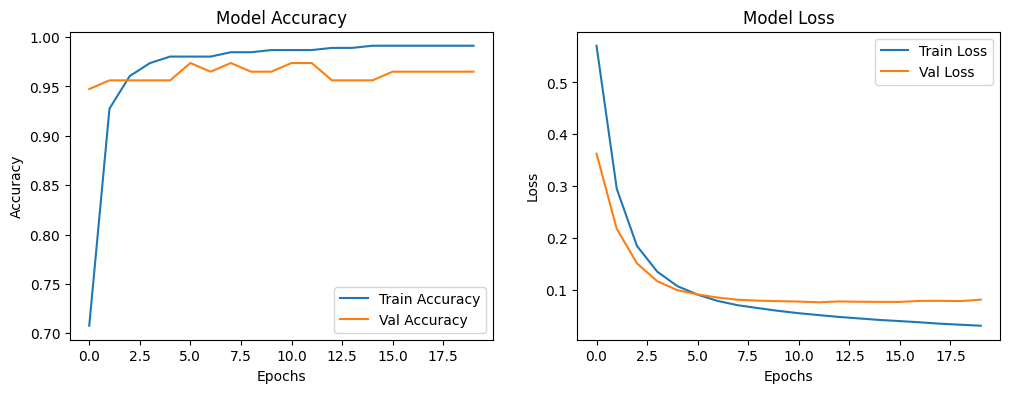

In [ ]:
# The Breast Cancer dataset from Scikit-Learn contains 569 samples with 30 numerical features extracted
# from digitized images of breast mass tumors. The goal is to classify tumors as malignant (1) or benign (0)
# based on these features. The dataset was originally curated from the Wisconsin Diagnostic Breast Cancer (WDBC)
# dataset and is commonly used for binary classification tasks in machine learning.

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras import layers, models

# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target  # Features and labels

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build model
model = models.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Binary classification
])

# Compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Evaluate model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_acc * 100:.2f}%')

# Plot accuracy and loss using Matplotlib
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss')

plt.show()


# Example 5 - Wine Quality Prediction (Multiclass Classification)**bold text**

Epoch 1/50


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.4985 - loss: 0.9829 - val_accuracy: 0.7500 - val_loss: 0.7531
Epoch 2/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7996 - loss: 0.7391 - val_accuracy: 0.9167 - val_loss: 0.5739
Epoch 3/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8845 - loss: 0.5926 - val_accuracy: 0.9722 - val_loss: 0.4434
Epoch 4/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9406 - loss: 0.4318 - val_accuracy: 0.9722 - val_loss: 0.3394
Epoch 5/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9685 - loss: 0.3217 - val_accuracy: 0.9722 - val_loss: 0.2620
Epoch 6/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9857 - loss: 0.2542 - val_accuracy: 0.9722 - val_loss: 0.2081
Epoch 7/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9964 - loss: 0.1834 - val_accuracy: 0.9444 - val_loss: 0.1706
Epoch 8/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9877 - loss: 0.1641 - val_accuracy: 0.9444 - val_loss: 0.1447
Epoch 9/50


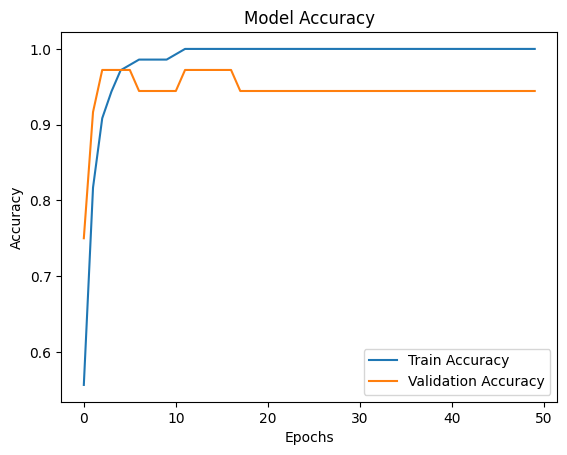

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
Predicted Class: 0, Actual Class: 0


In [ ]:

# The Wine dataset from Scikit-Learn contains 178 samples with 13 numerical features,
# such as alcohol content, flavonoids, and phenols, representing different chemical properties of wines.
# The goal is to classify wines into three types (Class 0, 1, and 2) based on their composition.
# It originates from the UCI Machine Learning Repository and is commonly used for multiclass classification tasks

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras import layers, models

# Load dataset
data = load_wine()
X, y = data.data, data.target  # Features and target labels

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Normalize features using Z-score standardization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build a neural network model
model = models.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(3, activation='softmax')  # 3 output classes (0, 1, 2)
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',  # Since y is not one-hot encoded
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=16, verbose=1, validation_data=(X_test, y_test))

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

# Plot training history
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')
plt.show()

# Predict a sample
sample_input = np.expand_dims(X_test[0], axis=0)  # Take one test sample
predicted_class = np.argmax(model.predict(sample_input))
print(f'Predicted Class: {predicted_class}, Actual Class: {y_test[0]}')

# Using stratify=y ensures that the proportion of each class remains the same in both training and testing sets,
# leading to a more balanced and representative split.

# Example: Without stratify=y
# If you have a dataset with 80% Class 0, 15% Class 1, and 5% Class 2,
# a random split without stratification might result in:

# Training set: 90% Class 0, 8% Class 1, 2% Class 2
# Test set: 60% Class 0, 30% Class 1, 10% Class 2

# This skews the distribution, leading to poor generalization.

# Example: With stratify=y

# Training set: 80% Class 0, 15% Class 1, 5% Class 2
# Test set: 80% Class 0, 15% Class 1, 5% Class 2

# This ensures a balanced representation of all classes in both sets.

# Always use stratify=y when working with classification problems, especially when your dataset has an unequal class distribution.

